In [1]:
import numpy as np
from scipy.io import loadmat
import pandas as pd

In [2]:
mnist = loadmat("mnist-original")
mnist_data = mnist["data"].T
mnist_label = mnist["label"].T
mnist_matrix=np.concatenate((mnist_data,mnist_label),axis=1)
mnist=pd.DataFrame(mnist_matrix)

In [3]:
mnist_label.shape

(70000, 1)

In [4]:
mnist_data.shape

(70000, 784)

In [5]:
mnist=mnist.astype(int)

In [6]:
data = mnist.iloc[:,:784]
target=mnist.iloc[:,784]

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
sample = np.random.randint(70000, size=5000)
data = data.iloc[sample]
target =target.iloc[sample]

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(data,target,test_size=0.2)

In [10]:
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(3)
knn.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [11]:
knn.score(Xtest,ytest)

0.922

In [12]:
error=[]
for k in range(2,10):
        knn=neighbors.KNeighborsClassifier(k)
        knn.fit(Xtrain,ytrain)
        error.append(1-knn.score(Xtest,ytest))

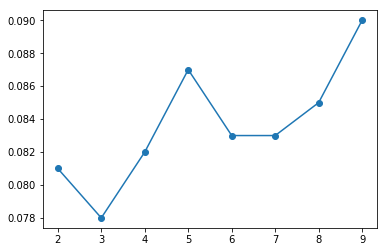

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(2,10),error,"o-")

In [14]:
knn=neighbors.KNeighborsClassifier(5)
knn.fit(Xtrain,ytrain)
predicted=knn.predict(Xtest)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

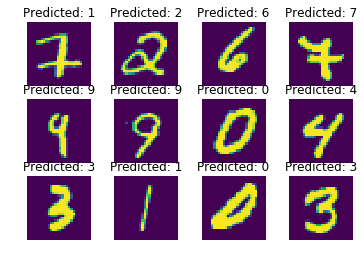

In [33]:
images=Xtest.values.reshape(-1,28,28)

select=np.random.randint(images.shape[0],size=12)

for index,value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.imshow(images[value])
    plt.axis('off')
    plt.title("Predicted: %i" % predicted[value])

In [56]:
misclassified=(predicted!=ytest)

misclassified_images=images[misclassified,:,:]
misclassified_predicted=predicted[misclassified]

misclassified_predicted

array([1, 7, 1, 3, 3, 0, 4, 1, 5, 1, 1, 9, 3, 3, 5, 9, 7, 3, 0, 7, 1, 4,
       1, 1, 2, 2, 0, 0, 3, 0, 9, 1, 9, 7, 3, 1, 1, 2, 3, 7, 2, 2, 3, 9,
       0, 6, 1, 0, 9, 9, 9, 1, 9, 5, 7, 9, 9, 3, 1, 9, 3, 9, 7, 9, 3, 9,
       8, 9, 3, 3, 5, 3, 1, 1, 0, 1, 9, 0, 9, 3, 9, 9, 7, 3, 4, 8, 1])

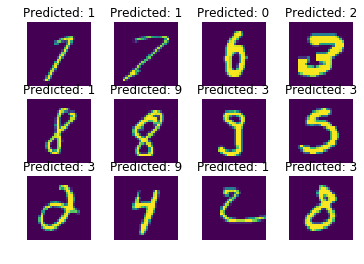

In [57]:
select=np.random.randint(misclassified_predicted.shape[0],size=12)

for index,value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.imshow(misclassified_images[value])
    plt.axis('off')
    plt.title("Predicted: %i" % misclassified_predicted[value])